In [1]:
from semdiffusers import SemanticEditPipeline
from semdiffusers import inversion
import torch
import os
from PIL import Image

device='cuda:0'
SD_path = '/media/inspur/disk/yychang_workspace/stable_diffusion_v1_5/stable-diffusion-v1-5/snapshots/module'
pipe = SemanticEditPipeline.from_pretrained(SD_path, safety_checker=None, ).to(device)

gen = torch.Generator(device=device)

/media/inspur/disk/yychang_workspace/code/sega/src/semdiffusers/pipeline_latent_edit_diffusion.py:12: FutureWarning: Importing `DiffusionPipeline` or `ImagePipelineOutput` from diffusers.pipeline_utils is deprecated. Please import from diffusers.pipelines.pipeline_utils instead.
  from diffusers.pipeline_utils import DiffusionPipeline


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/media/inspur/disk/yychang_workspace/code/sega/src/semdiffusers/pipeline_latent_edit_diffusion.py:80: UserWarning: You have disabled the safety checker for <class 'semdiffusers.pipeline_latent_edit_diffusion.SemanticEditPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .
  warnings.warn(


In [10]:
def image_grid(imgs, rows, cols, spacing = 20):
    assert len(imgs) == rows * cols
    
    w, h = imgs[0].size
    
    grid = Image.new('RGBA', size=(cols * w + (cols-1)*spacing, rows * h + (rows-1)*spacing ), color=(255,255,255,0))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=( i // rows * (w+spacing), i % rows * (h+spacing)))
        #print(( i // rows * w, i % rows * h))
    return grid


  0%|          | 0/51 [00:00<?, ?it/s]

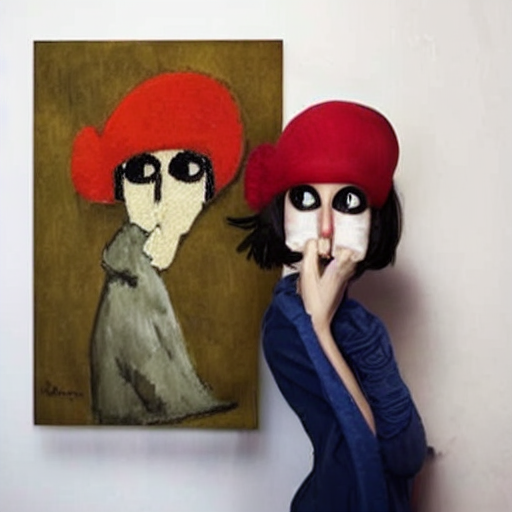

In [11]:
from PIL import Image  
# 设置editing_prompt为你要编辑的方向，例如'cat','smile','Bushy eyebrows',等,其他参数为sega参数，可以适当调整
target = {'editing_prompt': ['Mustache'], 'reverse_editing_direction':[False], 
          'edit_warmup_steps':10, 'edit_guidance_scale':1, 'edit_threshold':0.95, 'edit_momentum_scale':0.5, 'edit_mom_beta': 0.6}

noise_latent = inversion.inverse(test_img_path='/media/inspur/disk/yychang_workspace/code/NoiseCLR/images/choux.jpg',
                                 NUM_DDIM_STEPS=50,
                                 device=device)
prompt = ''
out = pipe(prompt=prompt, generator=gen, num_images_per_prompt=1, guidance_scale=7, latents=noise_latent,
       **target)
image_grid((out.images[0],), rows=1, cols=1)